# Credit Card Fraud Detection

## Importing the data set for intial exploration

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")

In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
df.shape

(5000, 15)

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


# EDA EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cat = df[["Card_Type","Merchant_Category","Location"]]

# Analysing the categorical columns

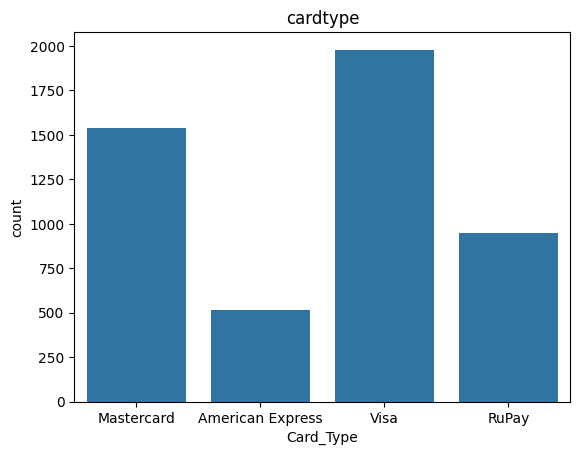

In [ ]:
sns.countplot(x="Card_Type",data =df)
plt.title("cardtype")
plt.show()
# In this most of the people are using the visa type of credit card holder

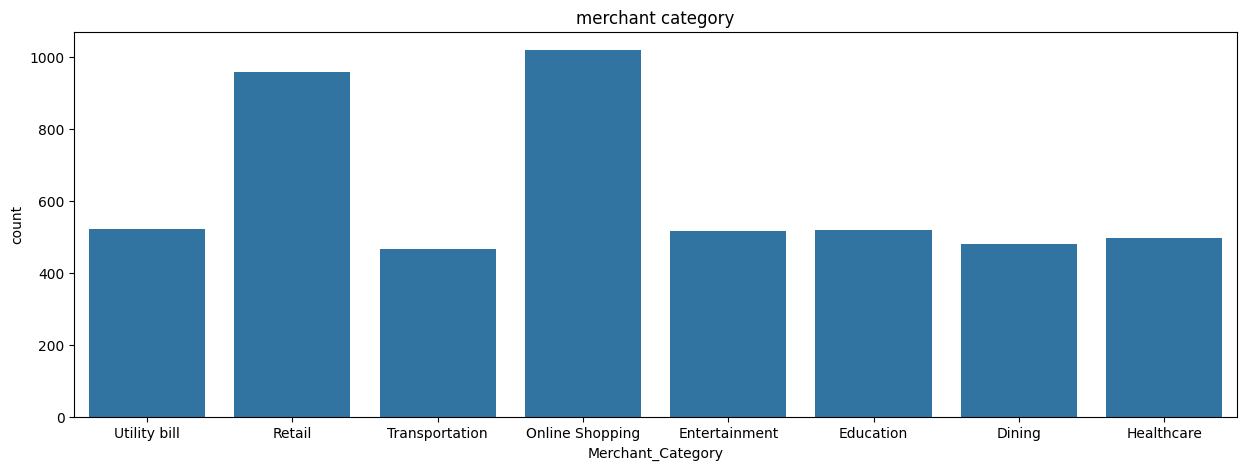

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(x="Merchant_Category",data =df)
plt.title("merchant category")
plt.show()
# Hear the online shopping merchant category is more using of credit card

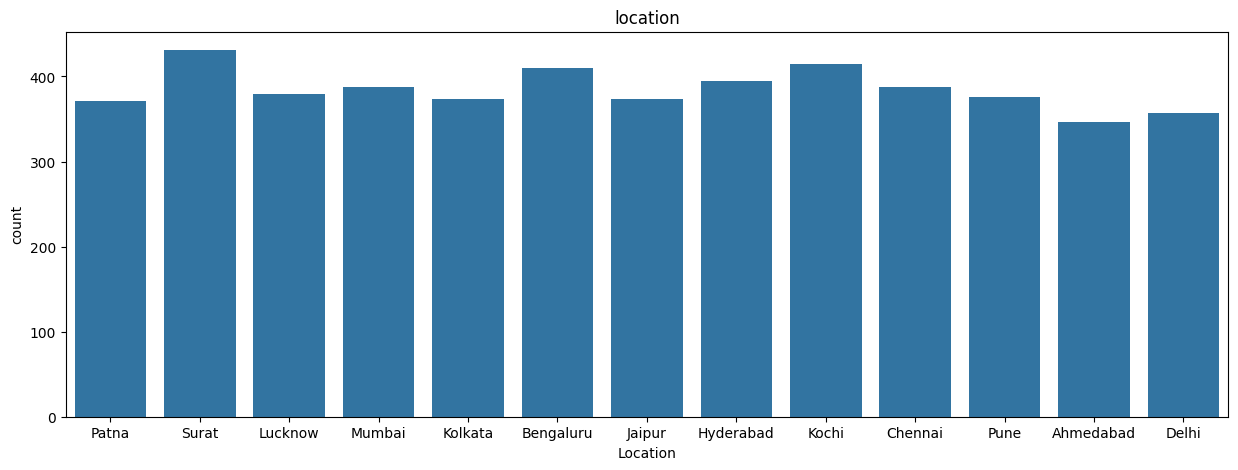

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Location",data =df)
plt.title("location")
plt.show()
# Hear the most of location used the credit card in surat location

In [ ]:
numeric =df[['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend']]

In [ ]:
descriptive_stats = numeric.describe()
print(descriptive_stats)

       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend  
count               4792.000000  
mean               63058.343566  
std                40056.989704  
min                10282.410000  
25%                33336.742500  
50%                49547.945000  
75%                83732.352500  
max               199898.290000  


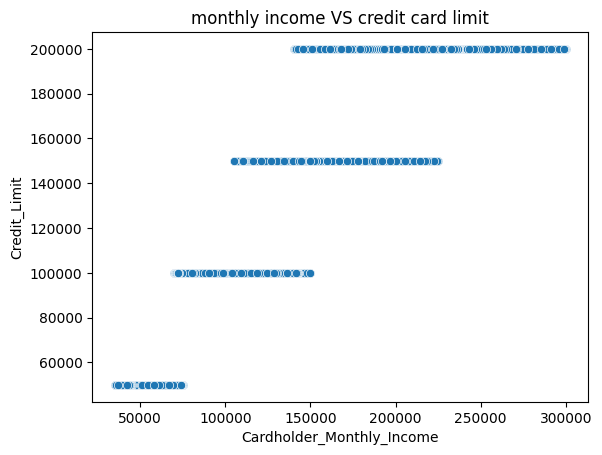

In [ ]:
sns.scatterplot(x="Cardholder_Monthly_Income",y="Credit_Limit",data =df)
plt.title("monthly income VS credit card limit")
plt.show()
# hear the monthly income as same as the card holder credit card limit

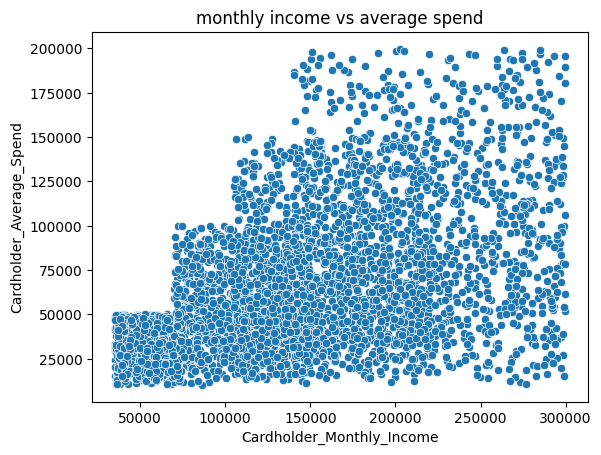

In [ ]:
sns.scatterplot(x='Cardholder_Monthly_Income',y="Cardholder_Average_Spend",data=df)
plt.title("monthly income vs average spend")
plt.show()
# they spending their total income as average spend credit card and more than > 2L salary they are spending below 2L
# spending credit limit

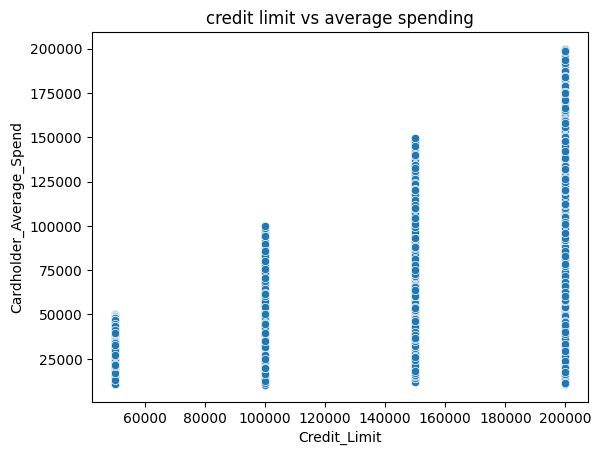

In [ ]:
sns.scatterplot(x="Credit_Limit",y="Cardholder_Average_Spend",data=df)
plt.title("credit limit vs average spending")
plt.show()
# They averagely they spending their limit only they didn't spend their lower than limit.

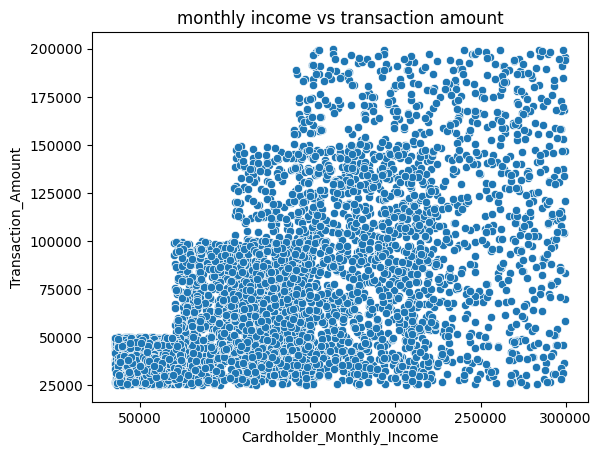

In [ ]:
sns.scatterplot(x="Cardholder_Monthly_Income",y="Transaction_Amount",data =df)
plt.title("monthly income vs transaction amount")
plt.show()
# they all spending their income as transaction amount

In [ ]:
correlation_matrix = df[['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income', 'Cardholder_Average_Spend','Credit_Limit']]

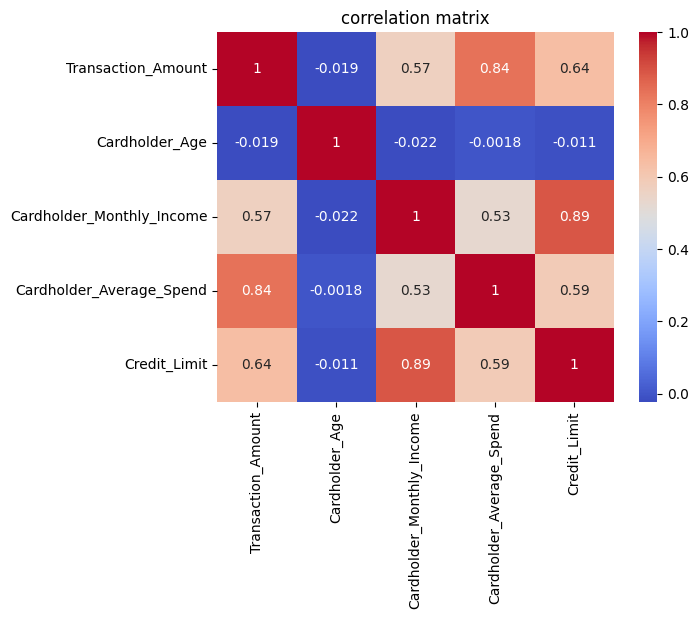

In [ ]:
sns.heatmap(correlation_matrix.corr(),annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()
# univarient of all numerical columns
# strong corelations are card avg spend,transaction amount,credit limit,card holder monthly income

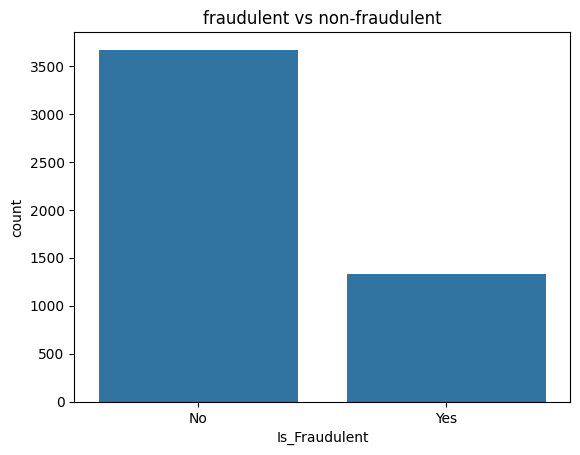

In [ ]:
sns.countplot(x="Is_Fraudulent",data=df)
plt.title("fraudulent vs non-fraudulent")
plt.show()
# hear the less number of fraudulent

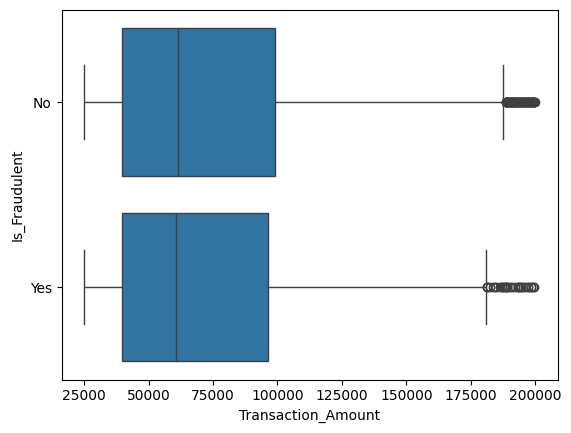

In [ ]:
sns.boxplot(x="Transaction_Amount",y="Is_Fraudulent",data=df)
plt.show()
# fraudulent is yes having the outliers

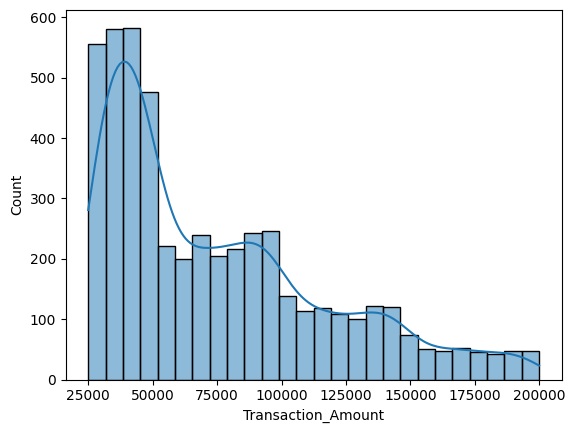

In [ ]:
sns.histplot(df['Transaction_Amount'],kde=True)
plt.show()
# more amount of the transaction is less count.and the transaction amount is less the count is higher.

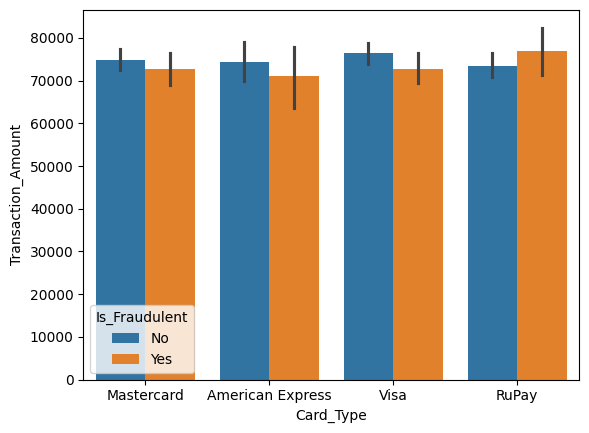

In [ ]:
sns.barplot(x="Card_Type",y="Transaction_Amount",hue="Is_Fraudulent",data=df)
plt.show()
# in this rupay card transaction is more fraudulent.

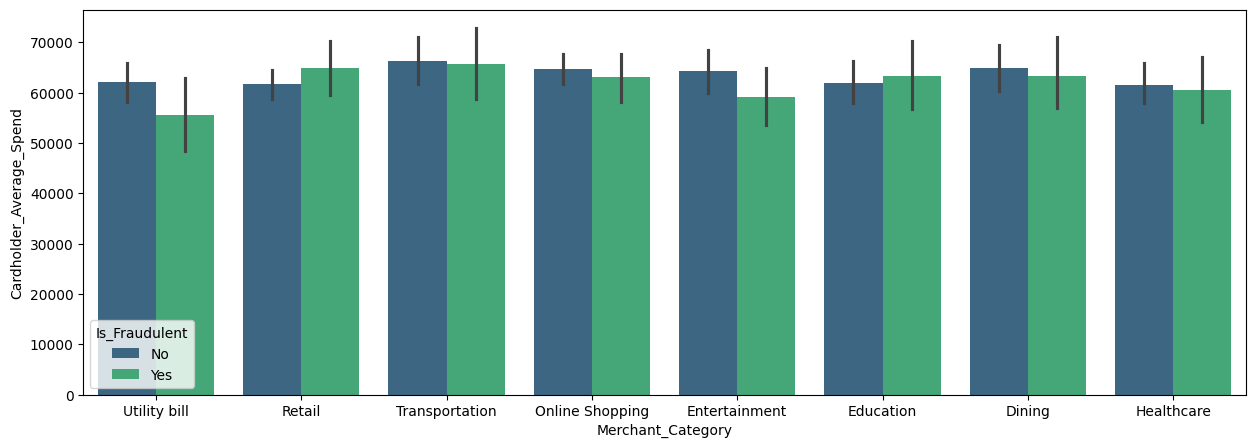

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Merchant_Category",y="Cardholder_Average_Spend",hue="Is_Fraudulent",palette="viridis",data=df)
plt.show()
# transportation in  the merchant categorgy is the more fraudulent occurs

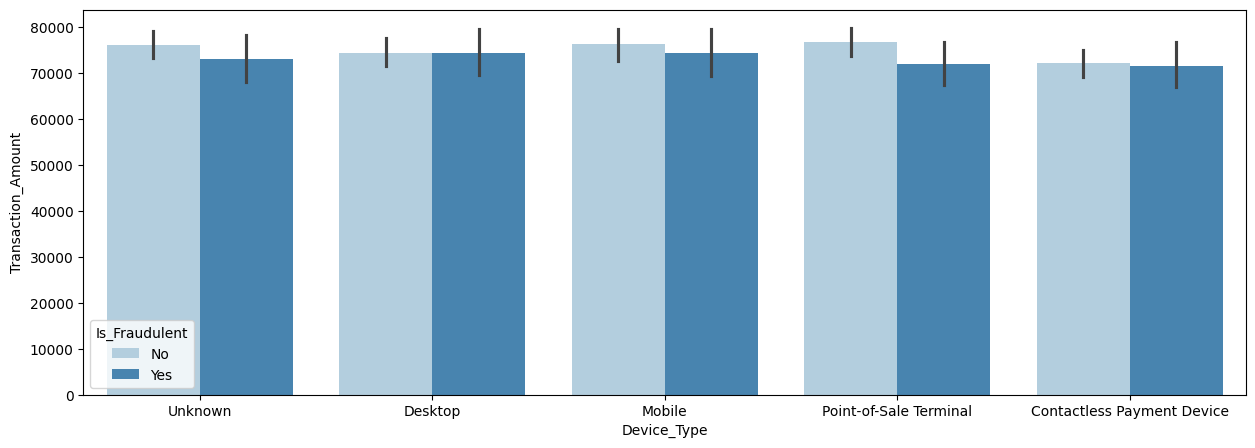

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Device_Type",y="Transaction_Amount",hue="Is_Fraudulent",palette="Blues",data=df)
plt.show()
# desktop device contains the more fraudulent in transcation

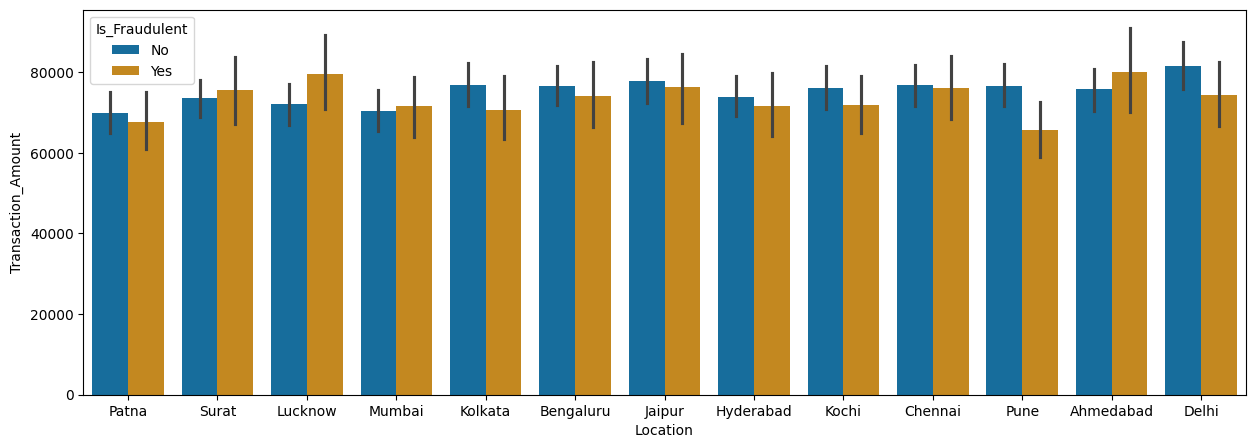

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Location",y="Transaction_Amount",hue="Is_Fraudulent",palette="colorblind",data= df)
plt.show()
# lucknow location is more fraudulent in transaction

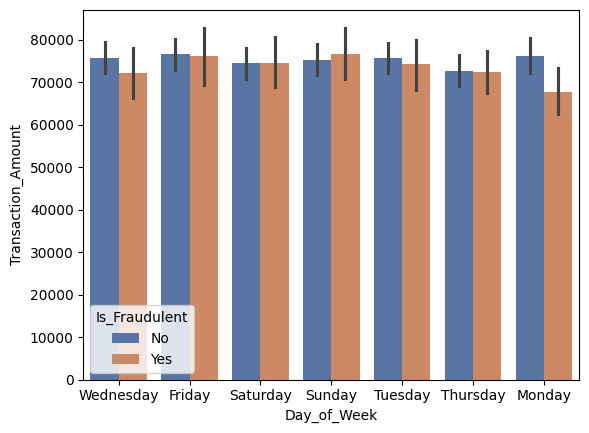

In [ ]:
sns.barplot(x="Day_of_Week",y="Transaction_Amount",hue="Is_Fraudulent",palette="deep",data=df)
plt.show()
# almost most of the days tranasction is high but the little bit higher than friday.

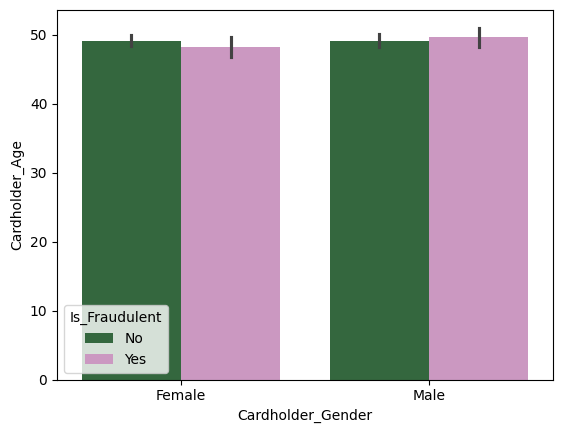

In [ ]:
sns.barplot(x="Cardholder_Gender",y="Cardholder_Age",hue="Is_Fraudulent",palette="cubehelix",data=df)
plt.show()
# combaning the age and gender the male fraudulent is high compare to female

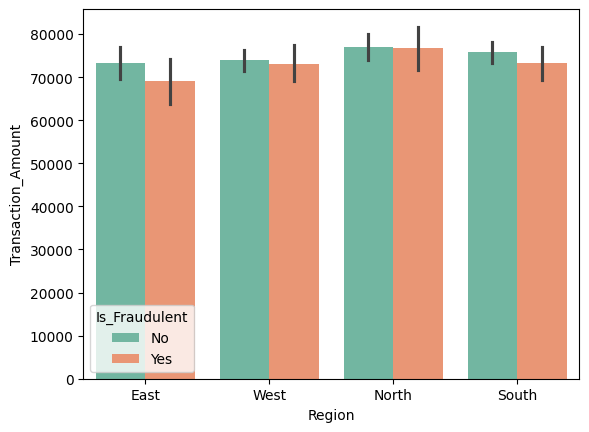

In [ ]:
sns.barplot(x="Region",y="Transaction_Amount",hue="Is_Fraudulent",palette="Set2",data=df)
plt.show()

# Data Preprocessing - Data Cleaning

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


## Hear i done the Feature Engineering because for imputation in KNNImputer
(KNNImupter imputation need to change the all columns as numeric)  

In [ ]:
categorical_columns = df.select_dtypes(include=["object"]).columns.to_list()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in categorical_columns:
  df[column] = le.fit_transform(df[column])


In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413,1,7,27214.0,0,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,4138,0,5,83956.0,1,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
2,3323,3,6,193280.0,2,10,0,NaN,1,210921.0,106668.60,200000.0,1,2,0
3,3775,2,4,167381.0,3,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,1
4,1925,2,5,81170.0,4,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0


In [ ]:
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=5)
imputed_array =imputer.fit_transform(df)
df=pd.DataFrame(imputed_array,columns=df.columns)

In [ ]:
df.isnull().sum() # null values has been finished

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


In [ ]:
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns.to_list()

In [ ]:
for column in numerical_columns:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR= q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
print(f"Column: Q1: {q1}, Q3: {q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower Bound: -1.5, Upper Bound: 2.5


In [ ]:
df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

In [ ]:
df.shape

(5000, 15)

In [ ]:
from scipy.stats import skew

In [ ]:
skwness = {}
for column in numerical_columns:
    skewness = skew(df[column])
    print(f"{column}: {skewness}")

Transaction_ID: 0.0
Card_Type: -0.28266598251050307
Merchant_Category: -0.19936450321204938
Transaction_Amount: 0.9665045355912277
Transaction_DateTime: 0.0
Location: -0.001194852471457614
Region: -0.36480303666073227
Cardholder_Age: -0.012290659553477332
Cardholder_Gender: 0.2710287779221173
Cardholder_Monthly_Income: 0.41956011403180565
Cardholder_Average_Spend: 1.139390613824649
Credit_Limit: 0.011968575554726512
Device_Type: -0.0019179215171493261
Day_of_Week: -0.008173844228043129
Is_Fraudulent: 1.056832261937309


In [ ]:
skwness = df[["Card_Type","Merchant_Category","Location","Region","Cardholder_Age","Cardholder_Average_Spend","Device_Type","Day_of_Week","Is_Fraudulent"]]

In [ ]:
for col in skwness:
  df[col] =df[col]**0.5

In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413.0,1.000000,2.645751,27214.0,0.0,3.162278,0.000000,4.795832,0.0,94632.0,190.708285,100000.0,2.000000,2.449490,0.0
1,4138.0,0.000000,2.236068,83956.0,1.0,3.464102,1.732051,7.000000,1.0,148118.0,298.628733,150000.0,1.000000,0.000000,0.0
2,3323.0,1.732051,2.449490,193280.0,2.0,3.162278,0.000000,6.511528,1.0,210921.0,326.601592,200000.0,1.000000,1.414214,0.0
3,3775.0,1.414214,2.000000,167381.0,3.0,3.464102,1.732051,7.211103,0.0,148070.0,416.119598,200000.0,1.000000,1.414214,1.0
4,1925.0,1.414214,2.236068,81170.0,4.0,2.828427,1.000000,6.082763,0.0,174470.0,229.593314,200000.0,1.414214,1.414214,0.0


# Feature Selection

In [ ]:
X = df.drop(columns=['Transaction_ID', 'Is_Fraudulent'])
y = df['Is_Fraudulent']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 9
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)

SelectKBest(k=9)

In [ ]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Merchant_Category', 'Transaction_Amount', 'Transaction_DateTime',
       'Location', 'Region', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Day_of_Week'],
      dtype='object')

# Split data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
df.head(10)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4413.0,1.000000,2.645751,27214.0,0.0,3.162278,0.000000,4.795832,0.0,94632.0,190.708285,100000.0,2.000000,2.449490,0.0
1,4138.0,0.000000,2.236068,83956.0,1.0,3.464102,1.732051,7.000000,1.0,148118.0,298.628733,150000.0,1.000000,0.000000,0.0
2,3323.0,1.732051,2.449490,193280.0,2.0,3.162278,0.000000,6.511528,1.0,210921.0,326.601592,200000.0,1.000000,1.414214,0.0
3,3775.0,1.414214,2.000000,167381.0,3.0,3.464102,1.732051,7.211103,0.0,148070.0,416.119598,200000.0,1.000000,1.414214,1.0
4,1925.0,1.414214,2.236068,81170.0,4.0,2.828427,1.000000,6.082763,0.0,174470.0,229.593314,200000.0,1.414214,1.414214,0.0
5,1670.0,1.414214,1.414214,131918.0,5.0,3.000000,1.732051,8.944272,1.0,166671.0,283.537370,150000.0,1.732051,1.414214,0.0
6,4644.0,1.732051,2.236068,139036.0,6.0,3.464102,1.732051,5.744563,1.0,171991.0,290.199483,150000.0,1.000000,1.732051,1.0
7,3383.0,1.414214,2.000000,49967.0,7.0,3.464102,1.732051,6.782330,0.0,56248.0,213.710037,50000.0,1.732051,1.732051,0.0
8,3128.0,1.000000,1.414214,44528.0,8.0,2.645751,0.000000,6.633250,1.0,93854.0,172.202555,100000.0,2.000000,1.732051,0.0
9,4184.0,1.000000,2.236068,29587.0,9.0,3.162278,0.000000,8.774964,0.0,55448.0,150.100500,50000.0,1.732051,1.732051,0.0


# Build the Machine Learning Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    }


In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,K-Nearest Neighbors,Support Vector Classifier
Accuracy,0.7512,0.7512,0.602400,0.749600,0.668800,0.7512
F1 Score,0.0000,0.0000,0.261516,0.018809,0.130252,0.0000


binary classfication the logistic regression performs well and also the navie bayes and svc peforms good

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[939,   0],
       [311,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
As = accuracy_score(y_test, y_pred)

In [ ]:
As

0.7512

In [ ]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)

In [ ]:
ps

0.0

In [ ]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, y_pred)

In [ ]:
rs

0.0

In [ ]:
from sklearn.metrics import f1_score
fs = f1_score(y_test, y_pred)

In [ ]:
fs

0.0

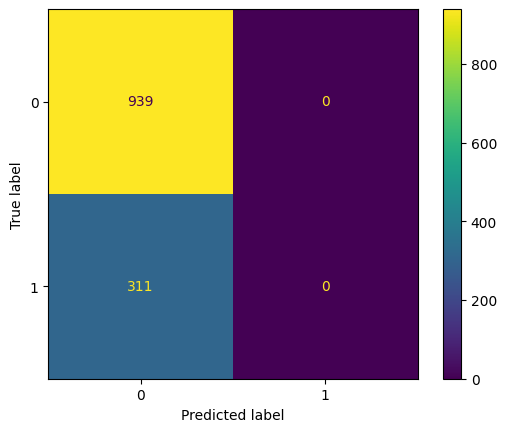

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=['0', '1'])
plt.show()